# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset

In [2]:
data = pd.read_csv('wiki_movie_plots_deduped.csv')
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


# Cleaning Dataset

## Visualizing most common classes

In [3]:
len(data['Genre'].value_counts())

2265

In [5]:
data['Genre'].value_counts().head(25)

unknown            6083
drama              5964
comedy             4379
horror             1167
action             1098
thriller            966
romance             923
western             865
crime               568
adventure           526
musical             467
crime drama         464
romantic comedy     461
science fiction     418
film noir           345
mystery             310
war                 273
animation           264
comedy, drama       236
sci-fi              221
family              217
fantasy             204
animated            195
musical comedy      154
comedy-drama        137
Name: Genre, dtype: int64

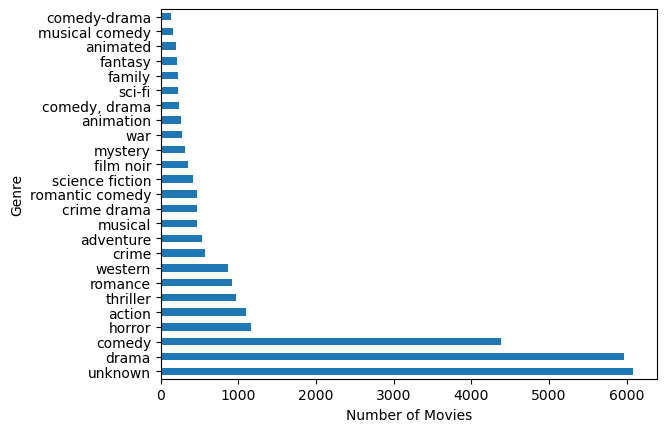

In [6]:
data['Genre'].value_counts().head(25).plot(kind='barh')
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

## Merging similar genre classes

In [7]:
len(data['Genre'].unique())

2265

In [8]:
genre_classes = ['horror', 'action', 'thriller', 'romance', 'western', 'crime', 'adventure', 'musical', 'science fiction', 'film noir', 'mystery']

In [9]:
copy_data = data.copy()

copy_data.Genre.replace('sci-fi', 'science fiction', inplace=True)

copy_data_2 = copy_data.copy()

## Removing unwanted classes

In [10]:
for genre in copy_data.Genre.unique():
    if genre not in genre_classes:
        copy_data.drop(copy_data[copy_data['Genre']==genre].index, inplace=True)

# New Dataset

## Checking Classes

In [11]:
copy_data.Genre.unique()

array(['western', 'adventure', 'horror', 'crime', 'mystery', 'romance',
       'thriller', 'musical', 'action', 'film noir', 'science fiction'],
      dtype=object)

In [12]:
len(copy_data)

7874

## Visualizing

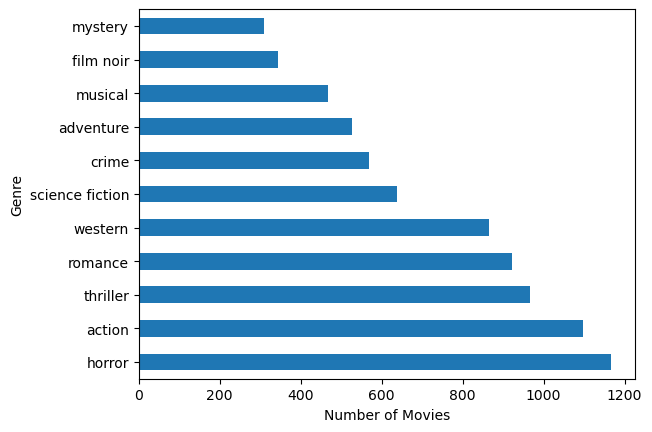

In [13]:
copy_data.Genre.value_counts().plot(kind='barh')
plt.ylabel("Genre")
plt.xlabel("Number of Movies")
plt.show()

## Saving

In [15]:
copy_data.to_csv("Classical NLP Approach/Data/cleaned_data.csv")